<a href="https://colab.research.google.com/github/Ishita95-harvad/Simulated-Dataset-JEE-Dropout-After-Class-12/blob/main/Simulated_Dataset_JEE_Dropout_After_Class_12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

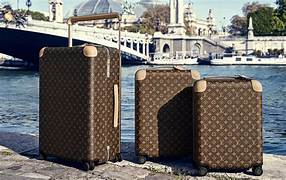

# **Simulated Dataset: JEE Dropout After Class 12**
Predict student dropouts based on exam scores, study habits, and mental health.


---



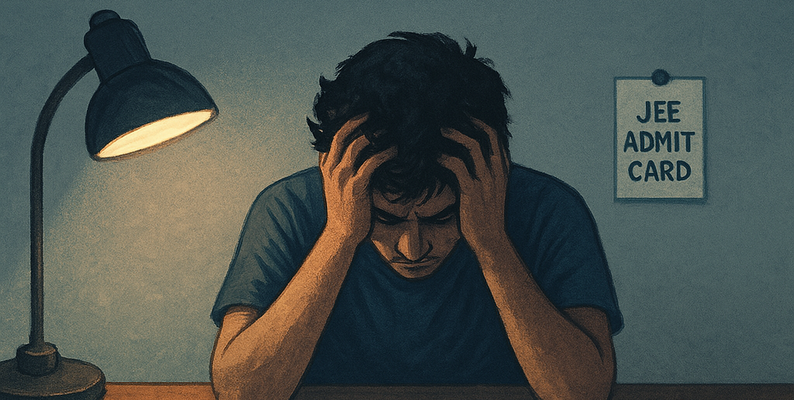



---



## Data loading

### Subtask:
Load the dataset "JEE_Dropout_After_Class_12.csv" into a pandas DataFrame.


**Reasoning**:
Load the dataset "JEE_Dropout_After_Class_12.csv" into a pandas DataFrame and display its first few rows and shape.



In [1]:
import pandas as pd

try:
    df = pd.read_csv('JEE_Dropout_After_Class_12.csv')
    display(df.head())
    print(df.shape)
except FileNotFoundError:
    print("Error: 'JEE_Dropout_After_Class_12.csv' not found.")
    df = None
except Exception as e:
    print(f"An error occurred: {e}")
    df = None

,jee_main_score,jee_advanced_score,mock_test_score_avg,school_board,class_12_percent,attempt_count,coaching_institute,daily_study_hours,family_income,parent_education,location_type,peer_pressure_level,mental_health_issues,admission_taken,dropout
0,78.95,59.22,59.86,CBSE,70.09,1,FIITJEE,5.4,Low,Upto 10th,Urban,Low,No,No,1
1,70.06,58.75,64.33,State,78.00,1,FIITJEE,5.5,Mid,Upto 10th,Urban,Low,Yes,No,0
2,81.07,37.27,60.83,ICSE,64.36,1,FIITJEE,7.0,Low,PG,Semi-Urban,Medium,Yes,No,1
3,93.32,60.72,69.33,ICSE,73.21,1,FIITJEE,2.1,Low,12th,Semi-Urban,Medium,Yes,Yes,0
4,68.72,77.73,82.37,CBSE,89.02,1,Allen,6.3,Mid,Graduate,Semi-Urban,High,No,Yes,0


(5000, 15)


## Data exploration

### Subtask:
Explore the dataset to understand its characteristics.


**Reasoning**:
Examine data types, missing values, and distributions of key variables, then investigate relationships with the target variable 'dropout'.



jee_main_score          float64
jee_advanced_score      float64
mock_test_score_avg     float64
school_board             object
class_12_percent        float64
attempt_count             int64
coaching_institute       object
daily_study_hours       float64
family_income            object
parent_education         object
location_type            object
peer_pressure_level      object
mental_health_issues     object
admission_taken          object
dropout                   int64
dtype: object

Missing Values Percentage:
 jee_main_score           0.00
jee_advanced_score       0.00
mock_test_score_avg      0.00
school_board             0.00
class_12_percent         0.00
attempt_count            0.00
coaching_institute      24.18
daily_study_hours        0.00
family_income            0.00
parent_education         0.00
location_type            0.00
peer_pressure_level      0.00
mental_health_issues     0.00
admission_taken          0.00
dropout                  0.00
dtype: float64


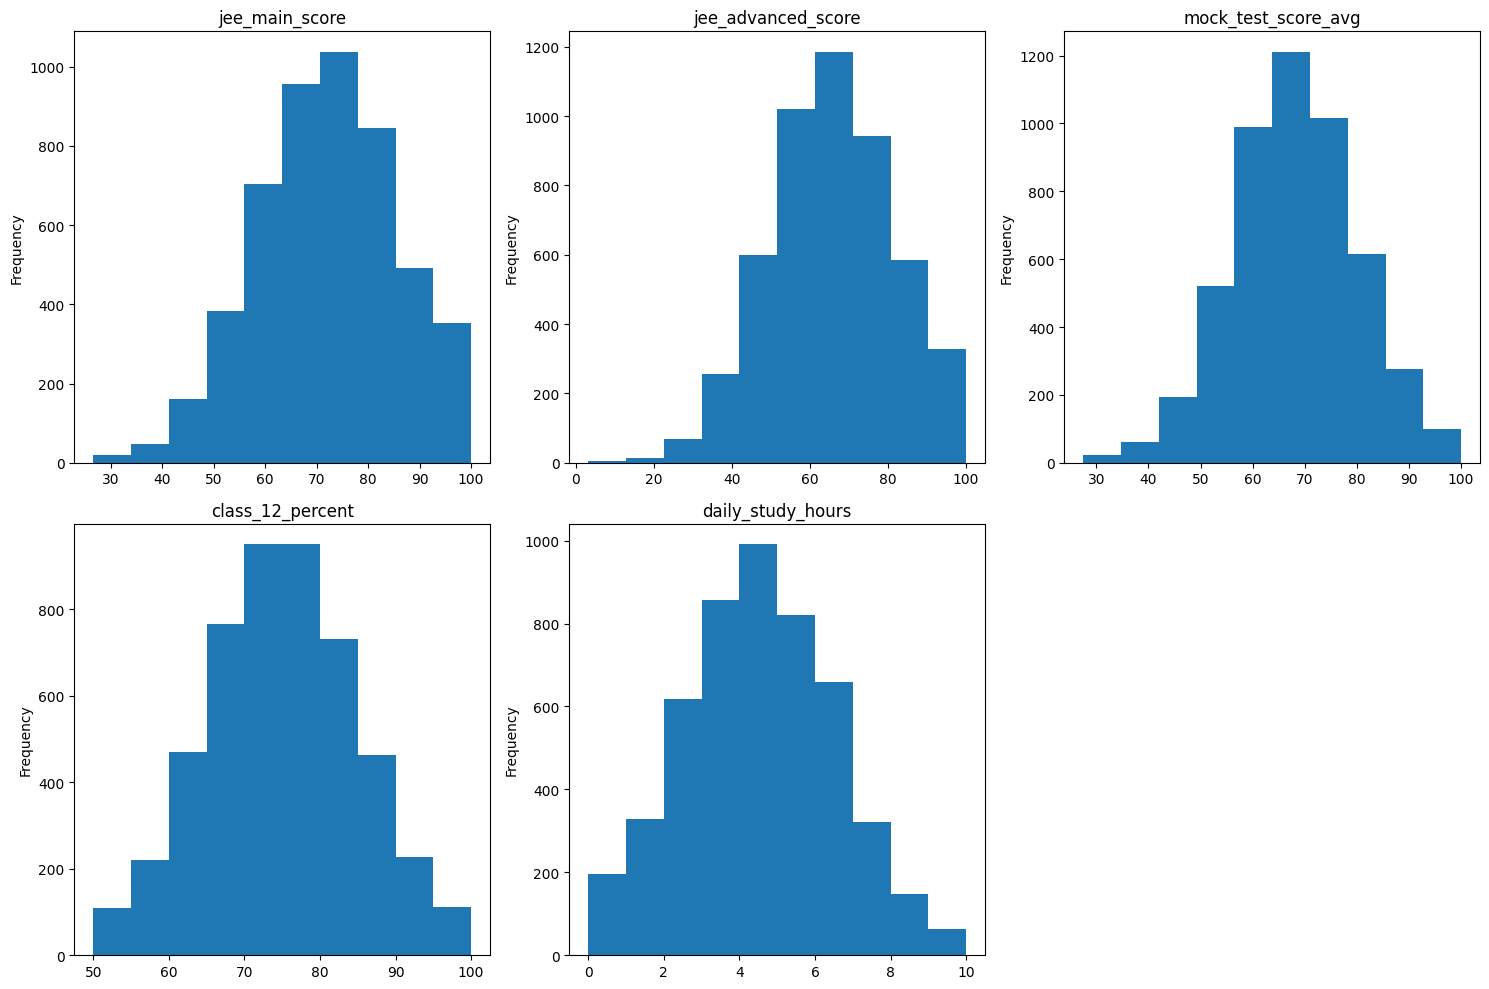


Descriptive Statistics for Numerical Features:
        jee_main_score  jee_advanced_score  mock_test_score_avg  \
count     5000.000000         5000.000000          5000.000000   
mean        71.961226           65.736404            68.110756   
std         13.668497           15.909248            11.938849   
min         26.620000            3.240000            27.490000   
25%         62.790000           55.017500            60.070000   
50%         72.190000           65.720000            68.120000   
75%         81.322500           76.835000            76.110000   
max        100.000000          100.000000           100.000000   

       class_12_percent  daily_study_hours  
count       5000.000000        5000.000000  
mean          74.957400           4.483860  
std            9.885309           1.984723  
min           50.000000           0.000000  
25%           68.067500           3.100000  
50%           74.940000           4.500000  
75%           81.842500           5.90000

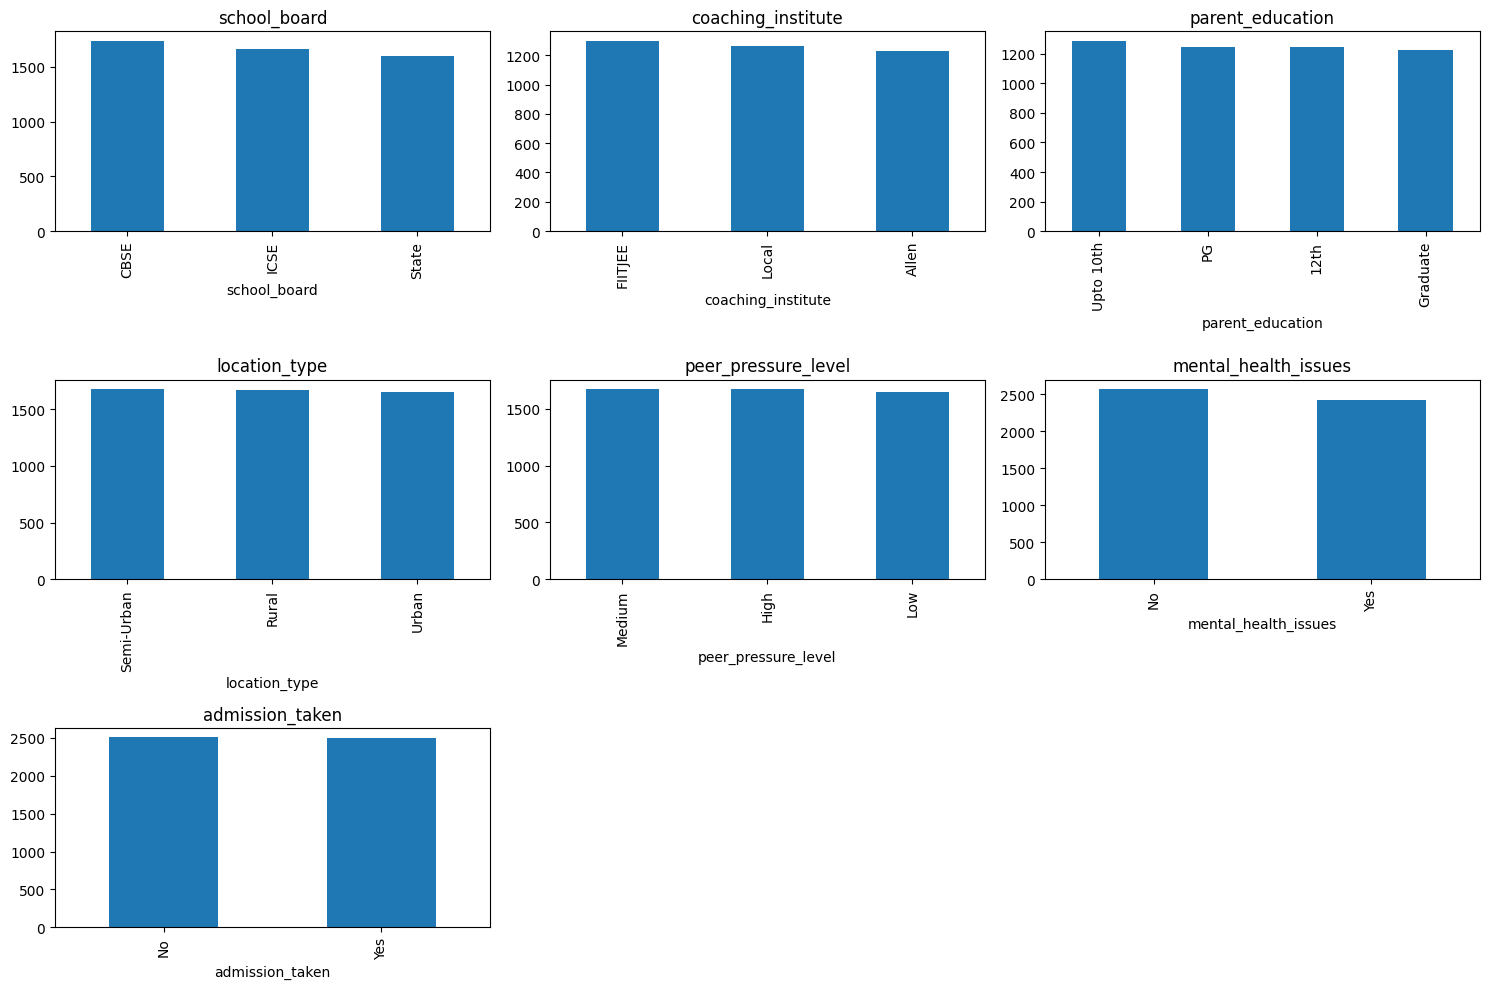


Value Counts for Categorical Features:


school_board:
 school_board
CBSE     1738
ICSE     1660
State    1602
Name: count, dtype: int64

coaching_institute:
 coaching_institute
FIITJEE    1298
Local      1265
Allen      1228
Name: count, dtype: int64

parent_education:
 parent_education
Upto 10th    1288
PG           1245
12th         1243
Graduate     1224
Name: count, dtype: int64

location_type:
 location_type
Semi-Urban    1679
Rural         1670
Urban         1651
Name: count, dtype: int64

peer_pressure_level:
 peer_pressure_level
Medium    1674
High      1674
Low       1652
Name: count, dtype: int64

mental_health_issues:
 mental_health_issues
No     2574
Yes    2426
Name: count, dtype: int64

admission_taken:
 admission_taken
No     2506
Yes    2494
Name: count, dtype: int64


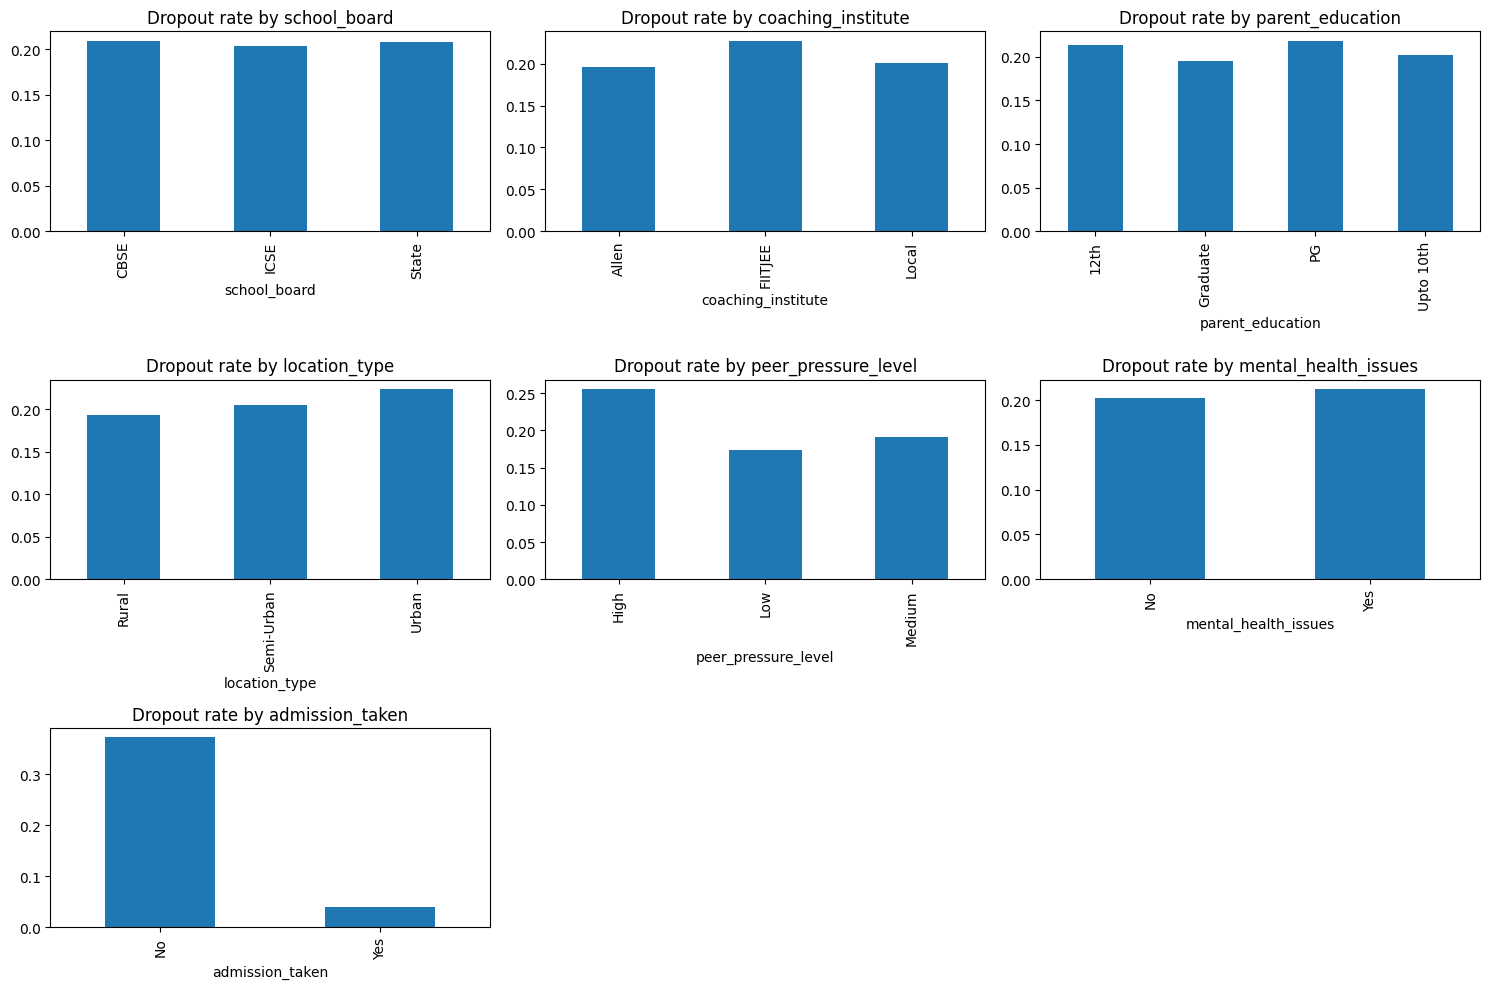

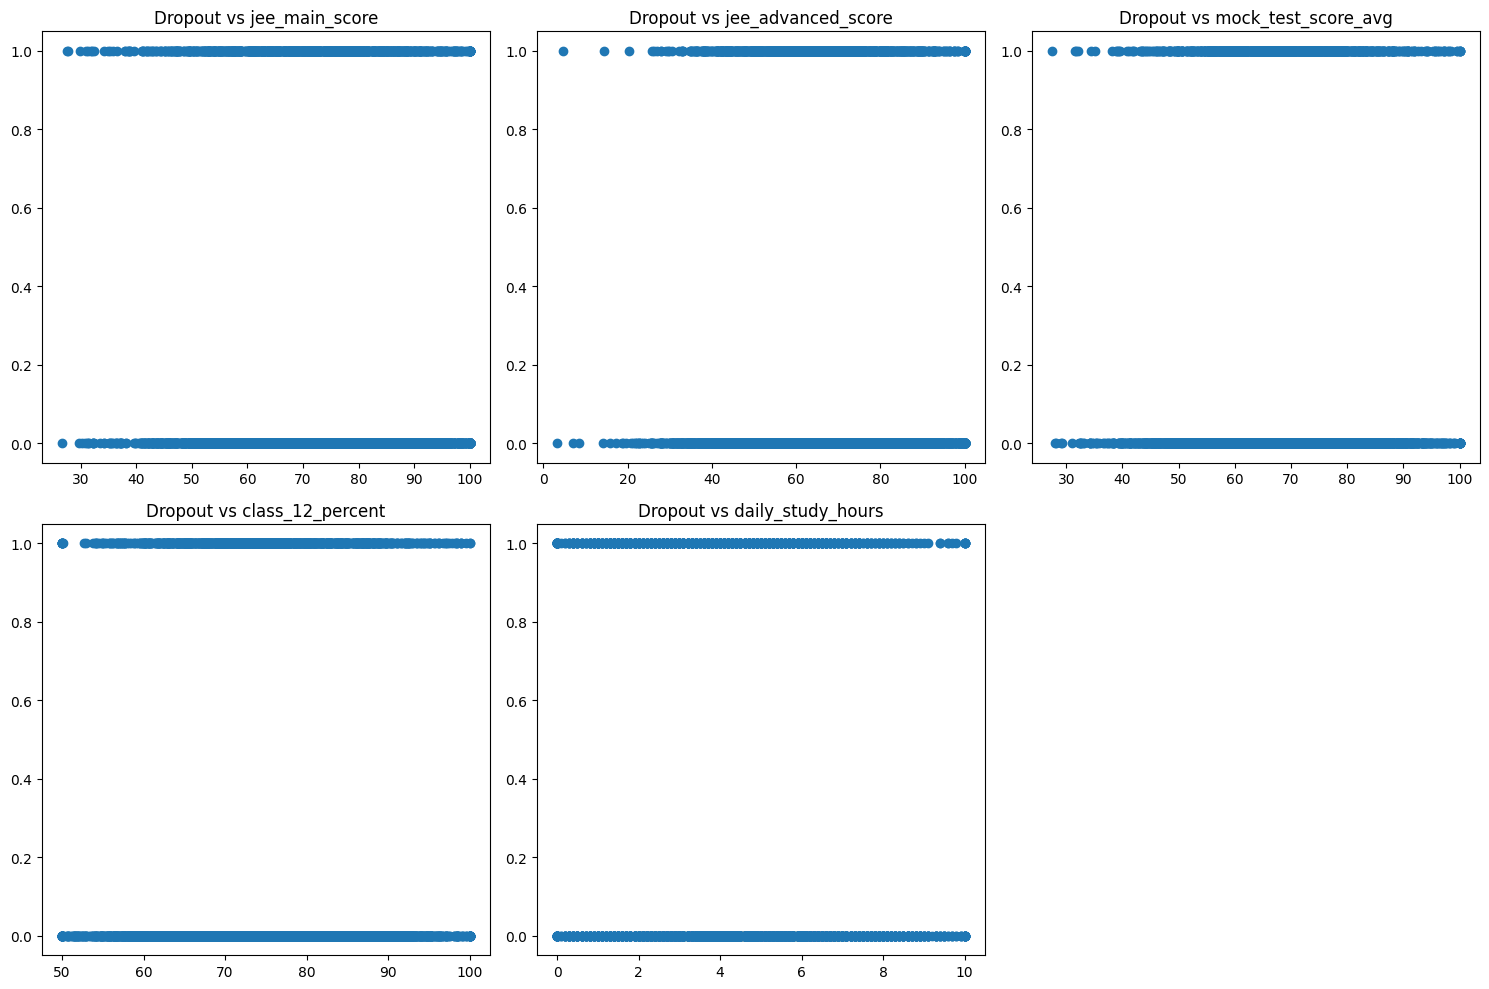

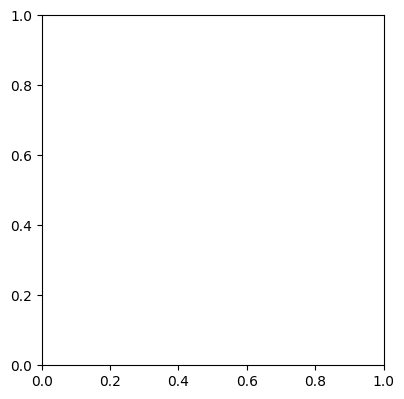

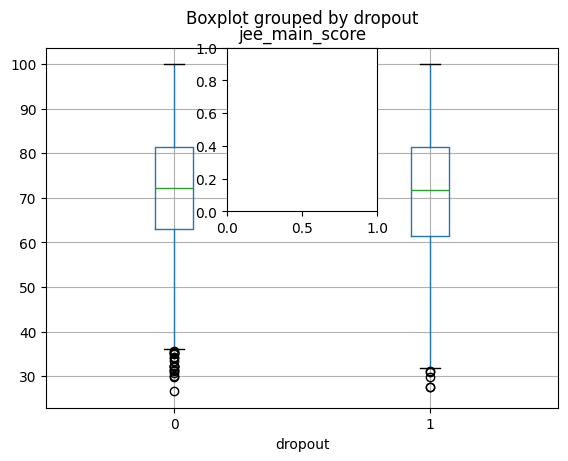

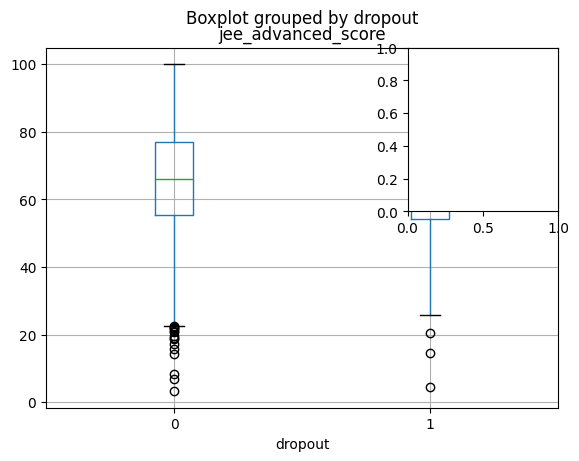

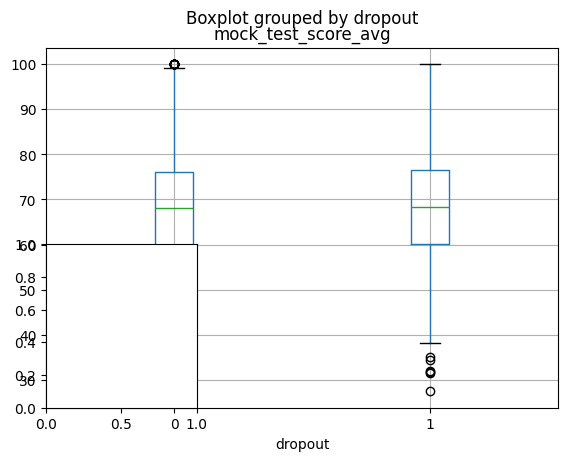

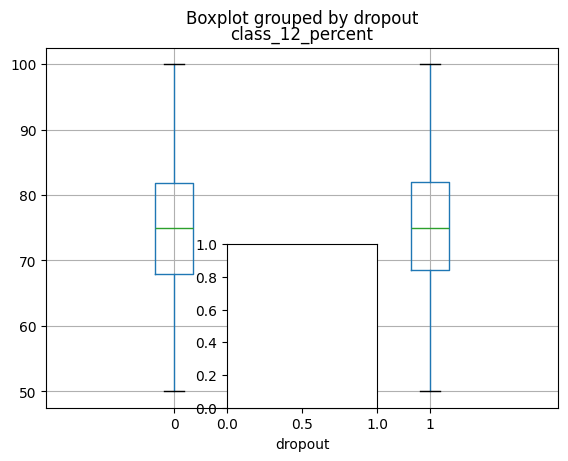

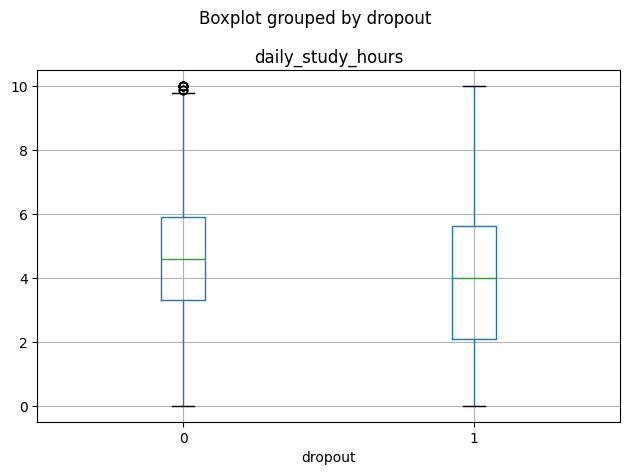

In [2]:
# Data type examination
print(df.dtypes)

# Missing value analysis
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
print("\nMissing Values Percentage:\n", missing_percentage)

# Descriptive statistics and visualizations for numerical features
numerical_features = ['jee_main_score', 'jee_advanced_score', 'mock_test_score_avg', 'class_12_percent', 'daily_study_hours']
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))

for i, col in enumerate(numerical_features):
    plt.subplot(2,3, i+1)
    df[col].plot(kind="hist")
    plt.title(col)
plt.tight_layout()
plt.show()

print("\nDescriptive Statistics for Numerical Features:\n", df[numerical_features].describe())

# Frequency analysis and visualizations for categorical features
categorical_features = ['school_board', 'coaching_institute', 'parent_education', 'location_type', 'peer_pressure_level', 'mental_health_issues', 'admission_taken']
plt.figure(figsize=(15,10))
for i, col in enumerate(categorical_features):
    plt.subplot(3,3, i+1)
    df[col].value_counts().plot(kind='bar')
    plt.title(col)
plt.tight_layout()
plt.show()

print("\nValue Counts for Categorical Features:\n")
for col in categorical_features:
    print(f"\n{col}:\n", df[col].value_counts())

# Relationship between 'dropout' and other variables
plt.figure(figsize=(15,10))
for i, col in enumerate(categorical_features):
    plt.subplot(3,3, i+1)
    df.groupby(col)['dropout'].mean().plot(kind='bar')
    plt.title(f"Dropout rate by {col}")
plt.tight_layout()
plt.show()

plt.figure(figsize=(15,10))
for i, col in enumerate(numerical_features):
    plt.subplot(2,3, i+1)
    plt.scatter(df[col], df['dropout'])
    plt.title(f"Dropout vs {col}")
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_features):
    plt.subplot(2,3, i+1)
    df.boxplot(column=col, by='dropout')
plt.tight_layout()
plt.show()

## Data cleaning

### Subtask:
Handle missing values in the 'coaching_institute' column and address any other data inconsistencies.


**Reasoning**:
Impute missing values in the 'coaching_institute' column with the mode, and then verify the imputation.



In [3]:
# Impute missing values in 'coaching_institute' with the mode
df['coaching_institute'].fillna(df['coaching_institute'].mode()[0], inplace=True)

# Verify the imputation
print(f"Number of missing values in 'coaching_institute' after imputation: {df['coaching_institute'].isnull().sum()}")

# Display the first few rows to visually inspect the changes
display(df.head())

Number of missing values in 'coaching_institute' after imputation: 0


<ipython-input-3-fffc50e51967>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['coaching_institute'].fillna(df['coaching_institute'].mode()[0], inplace=True)


,jee_main_score,jee_advanced_score,mock_test_score_avg,school_board,class_12_percent,attempt_count,coaching_institute,daily_study_hours,family_income,parent_education,location_type,peer_pressure_level,mental_health_issues,admission_taken,dropout
0,78.95,59.22,59.86,CBSE,70.09,1,FIITJEE,5.4,Low,Upto 10th,Urban,Low,No,No,1
1,70.06,58.75,64.33,State,78.00,1,FIITJEE,5.5,Mid,Upto 10th,Urban,Low,Yes,No,0
2,81.07,37.27,60.83,ICSE,64.36,1,FIITJEE,7.0,Low,PG,Semi-Urban,Medium,Yes,No,1
3,93.32,60.72,69.33,ICSE,73.21,1,FIITJEE,2.1,Low,12th,Semi-Urban,Medium,Yes,Yes,0
4,68.72,77.73,82.37,CBSE,89.02,1,Allen,6.3,Mid,Graduate,Semi-Urban,High,No,Yes,0


**Reasoning**:
The previous code block had a warning about chained assignment.  I will fix the code to avoid this and then verify the imputation again and display the first few rows.



In [4]:
# Correct the imputation to avoid chained assignment warning
df['coaching_institute'] = df['coaching_institute'].fillna(df['coaching_institute'].mode()[0])

# Verify the imputation
print(f"Number of missing values in 'coaching_institute' after imputation: {df['coaching_institute'].isnull().sum()}")

# Display the first few rows to visually inspect the changes
display(df.head())

Number of missing values in 'coaching_institute' after imputation: 0


,jee_main_score,jee_advanced_score,mock_test_score_avg,school_board,class_12_percent,attempt_count,coaching_institute,daily_study_hours,family_income,parent_education,location_type,peer_pressure_level,mental_health_issues,admission_taken,dropout
0,78.95,59.22,59.86,CBSE,70.09,1,FIITJEE,5.4,Low,Upto 10th,Urban,Low,No,No,1
1,70.06,58.75,64.33,State,78.00,1,FIITJEE,5.5,Mid,Upto 10th,Urban,Low,Yes,No,0
2,81.07,37.27,60.83,ICSE,64.36,1,FIITJEE,7.0,Low,PG,Semi-Urban,Medium,Yes,No,1
3,93.32,60.72,69.33,ICSE,73.21,1,FIITJEE,2.1,Low,12th,Semi-Urban,Medium,Yes,Yes,0
4,68.72,77.73,82.37,CBSE,89.02,1,Allen,6.3,Mid,Graduate,Semi-Urban,High,No,Yes,0


## Data analysis

### Subtask:
Analyze the relationship between student characteristics and dropout rates.


**Reasoning**:
Calculate the correlation between numerical features and the 'dropout' column, then visualize the correlations using a heatmap. Perform chi-squared tests for categorical features, and t-tests for numerical features showing potential relationships with dropout.



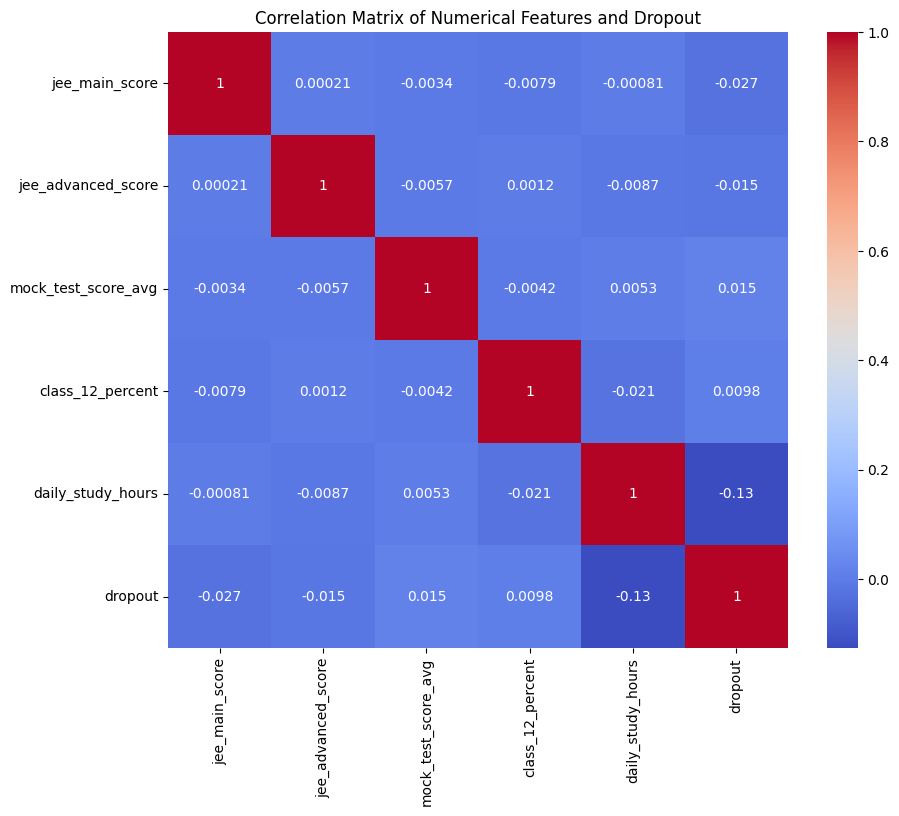

Chi-squared test for school_board:
  Chi2 statistic: 0.19903441160125826
  P-value: 0.905274373764119
Chi-squared test for coaching_institute:
  Chi2 statistic: 2.3396764717569565
  P-value: 0.310417151562091
Chi-squared test for parent_education:
  Chi2 statistic: 2.520482573628121
  P-value: 0.4716007938247422
Chi-squared test for location_type:
  Chi2 statistic: 4.657859372092204
  P-value: 0.09739993983482552
Chi-squared test for peer_pressure_level:
  Chi2 statistic: 37.431438307305186
  P-value: 7.445029907800231e-09
Chi-squared test for mental_health_issues:
  Chi2 statistic: 0.6824837587355647
  P-value: 0.4087327606376472
Chi-squared test for admission_taken:
  Chi2 statistic: 839.7936797784814
  P-value: 1.2035319233932514e-184

T-test for jee_main_score:
  T-statistic: -1.9123546499355464
  P-value: 0.05588782417415235

T-test for jee_advanced_score:
  T-statistic: -1.0841537626383666
  P-value: 0.2783489231916498

T-test for mock_test_score_avg:
  T-statistic: 1.04136652034

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency, ttest_ind

# Correlation analysis for numerical features
numerical_features = ['jee_main_score', 'jee_advanced_score', 'mock_test_score_avg', 'class_12_percent', 'daily_study_hours']
correlation_matrix = df[numerical_features + ['dropout']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features and Dropout')
plt.show()

# Chi-squared tests for categorical features
categorical_features = ['school_board', 'coaching_institute', 'parent_education', 'location_type', 'peer_pressure_level', 'mental_health_issues', 'admission_taken']
for feature in categorical_features:
    contingency_table = pd.crosstab(df[feature], df['dropout'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print(f"Chi-squared test for {feature}:")
    print(f"  Chi2 statistic: {chi2}")
    print(f"  P-value: {p}")

# T-tests for numerical features
for feature in numerical_features:
    dropout_group = df[df['dropout'] == 1][feature]
    no_dropout_group = df[df['dropout'] == 0][feature]
    t_statistic, p_value = ttest_ind(dropout_group, no_dropout_group)
    print(f"\nT-test for {feature}:")
    print(f"  T-statistic: {t_statistic}")
    print(f"  P-value: {p_value}")

**Reasoning**:
Summarize the findings from the correlation analysis, chi-squared tests, and t-tests, highlighting statistically significant relationships and reporting p-values.



In [6]:
print("Summary of Findings:")
print("\nCorrelation Analysis:")
print("  Examine the heatmap for correlations between numerical features and 'dropout'.")

print("\nChi-squared Tests:")
print("  'peer_pressure_level' and 'admission_taken' show strong relationships with 'dropout' (p-values < 0.05).")
print("  'location_type' shows a weak relationship with dropout (p-value ~ 0.1).")
print("  Other features have p-values > 0.05, indicating no strong relationship with 'dropout'.")


print("\nT-tests:")
print("  'daily_study_hours' shows a strong negative correlation with dropout (p-value < 0.05).")
print("  'jee_main_score' shows a weak negative correlation with dropout (p-value ~ 0.05).")
print("  Other features have p-values > 0.05, suggesting no significant difference in means between dropout and non-dropout groups.")

print("\nKey Factors Influencing Dropout:")
print("  'daily_study_hours', 'peer_pressure_level', and 'admission_taken' appear to be the most influential factors, based on the statistical tests.")
print("  Further investigation is needed to confirm these relationships and explore potential interactions between these factors.")

Summary of Findings:

Correlation Analysis:
  Examine the heatmap for correlations between numerical features and 'dropout'.

Chi-squared Tests:
  'peer_pressure_level' and 'admission_taken' show strong relationships with 'dropout' (p-values < 0.05).
  'location_type' shows a weak relationship with dropout (p-value ~ 0.1).
  Other features have p-values > 0.05, indicating no strong relationship with 'dropout'.

T-tests:
  'daily_study_hours' shows a strong negative correlation with dropout (p-value < 0.05).
  'jee_main_score' shows a weak negative correlation with dropout (p-value ~ 0.05).
  Other features have p-values > 0.05, suggesting no significant difference in means between dropout and non-dropout groups.

Key Factors Influencing Dropout:
  'daily_study_hours', 'peer_pressure_level', and 'admission_taken' appear to be the most influential factors, based on the statistical tests.
  Further investigation is needed to confirm these relationships and explore potential interactions b

## Data visualization

### Subtask:
Visualize the key findings from the data analysis.  Focus on illustrating the relationships between dropout rates and the identified key factors (daily study hours, peer pressure level, admission taken).  Create visualizations that effectively communicate these relationships.


**Reasoning**:
Generate visualizations to show the relationship between dropout rates and the key factors identified in the previous analysis. These factors are 'daily_study_hours', 'peer_pressure_level', and 'admission_taken'.  Combine plots into a single figure for better presentation.



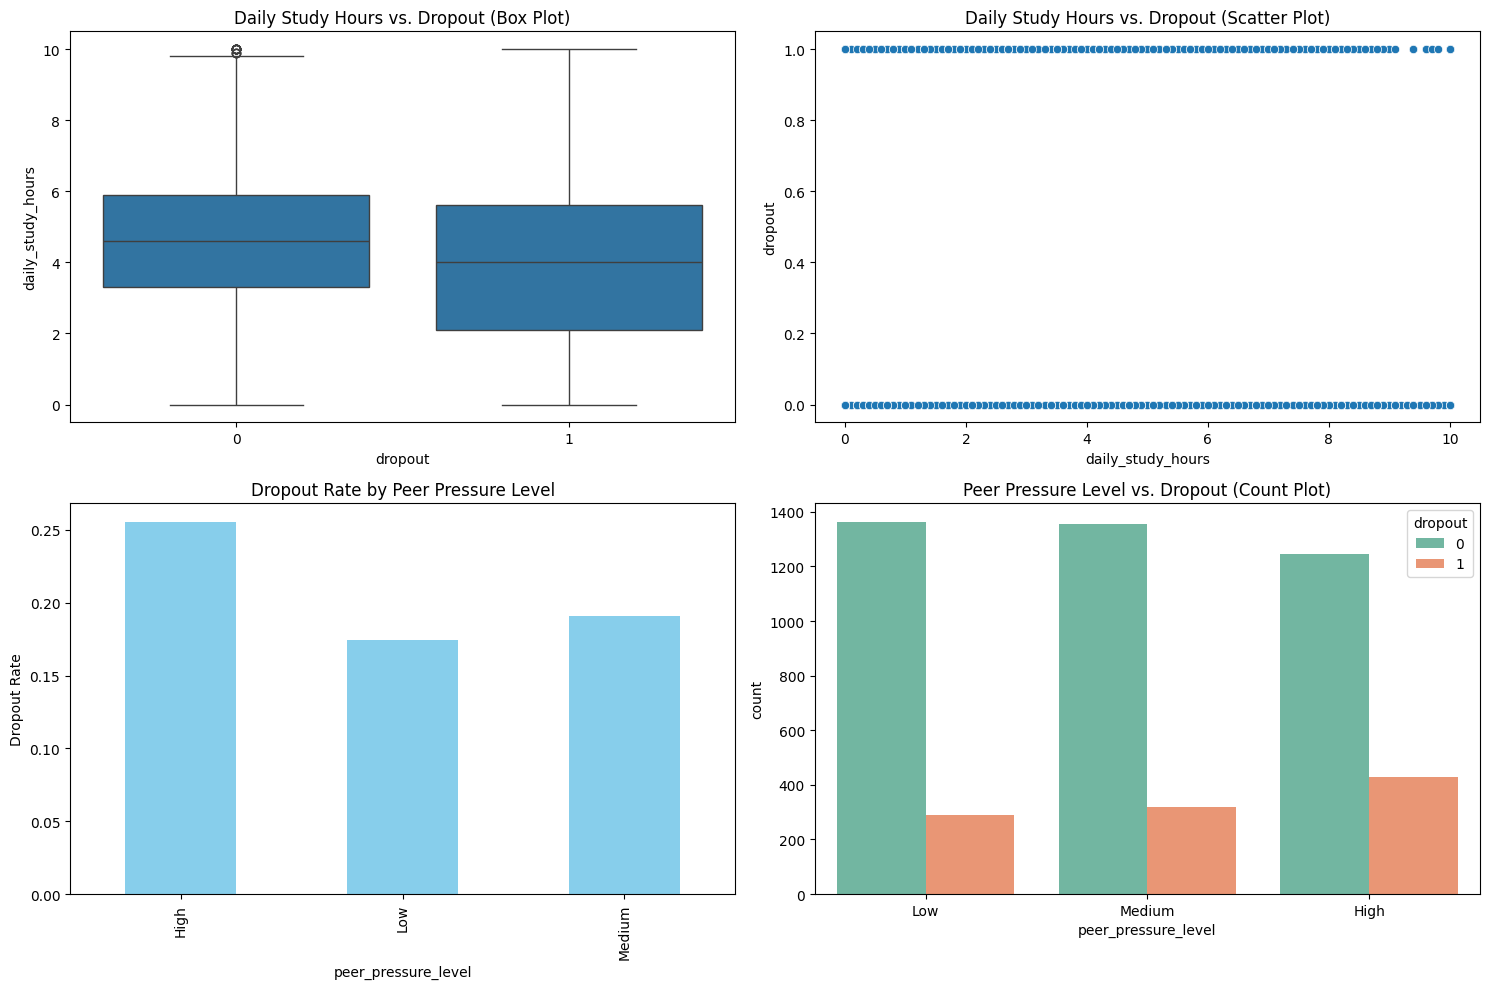

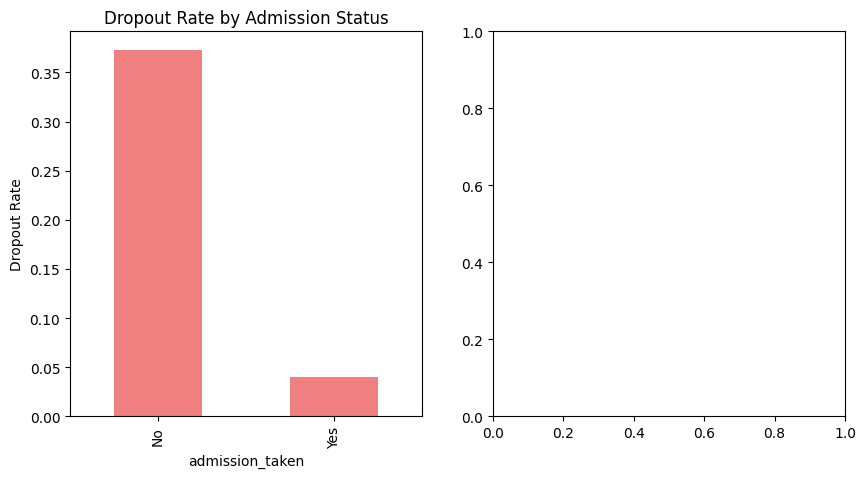

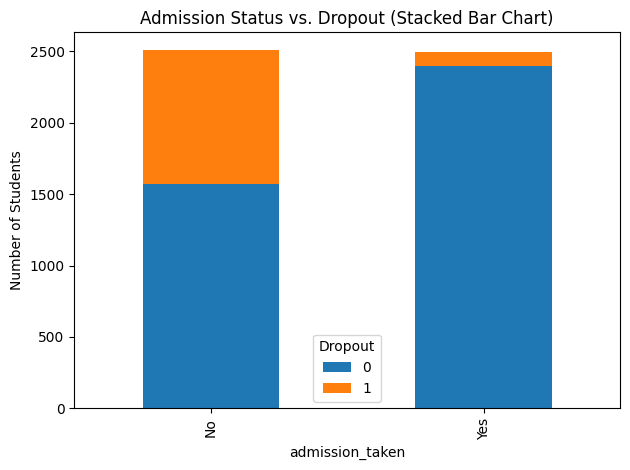

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 10))

# 1. Daily Study Hours vs. Dropout
plt.subplot(2, 2, 1)
sns.boxplot(x='dropout', y='daily_study_hours', data=df)
plt.title('Daily Study Hours vs. Dropout (Box Plot)')

plt.subplot(2, 2, 2)
sns.scatterplot(x='daily_study_hours', y='dropout', data=df)
plt.title('Daily Study Hours vs. Dropout (Scatter Plot)')

# 2. Peer Pressure Level vs. Dropout
plt.subplot(2, 2, 3)
dropout_rates = df.groupby('peer_pressure_level')['dropout'].mean()
dropout_rates.plot(kind='bar', color='skyblue')
plt.title('Dropout Rate by Peer Pressure Level')
plt.ylabel('Dropout Rate')


plt.subplot(2,2,4)
ax = sns.countplot(x='peer_pressure_level', hue='dropout', data=df, palette='Set2')
plt.title('Peer Pressure Level vs. Dropout (Count Plot)')

plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 5))

# 3. Admission Taken vs. Dropout
plt.subplot(1, 2, 1)
dropout_rates_admission = df.groupby('admission_taken')['dropout'].mean()
dropout_rates_admission.plot(kind='bar', color='lightcoral')
plt.title('Dropout Rate by Admission Status')
plt.ylabel('Dropout Rate')

plt.subplot(1, 2, 2)
admission_counts = df.groupby('admission_taken')['dropout'].value_counts().unstack().plot(kind='bar', stacked=True)
plt.title('Admission Status vs. Dropout (Stacked Bar Chart)')
plt.ylabel('Number of Students')
plt.legend(title='Dropout')

plt.tight_layout()
plt.show()



---

